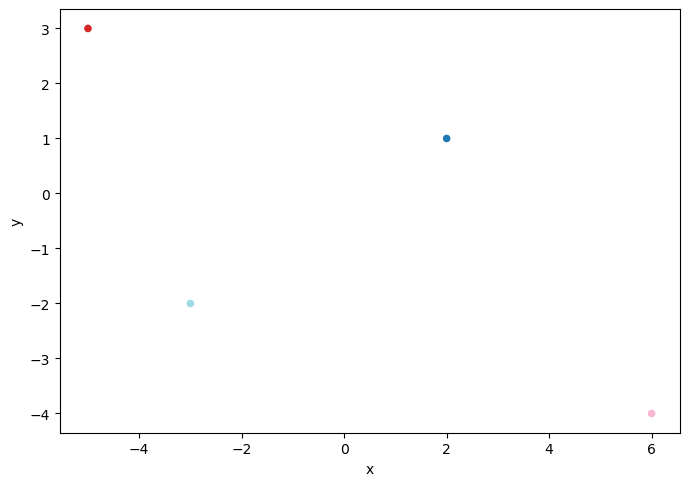

In [1]:
import pandas as pd
xy_df = pd.DataFrame({
    "x": [2, -5, 6, -3],
    "y": [1, 3, -4, -2]
})

ax = xy_df.plot.scatter(x="x", y="y", c=range(4), colorbar=False, cmap="tab20", figsize=(8.0, 5.5))

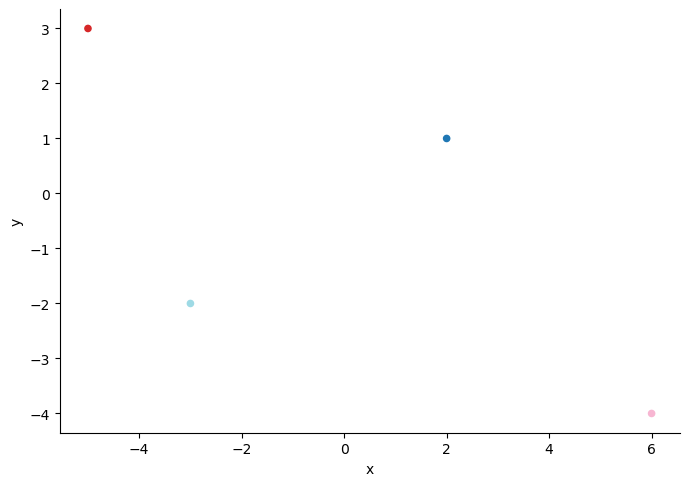

In [2]:
ax = xy_df.plot.scatter(x="x", y="y", c=range(4), colorbar=False, cmap="tab20", figsize=(8.0, 5.5))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible("zero")
ax.spines["bottom"].set_visible("zero")

In [3]:
import numpy as np

In [4]:
xy_df["r"] = np.sqrt((xy_df["x"] ** 2) + (xy_df["y"] ** 2))
xy_df["phi"] = np.arccos(xy_df["x"] / xy_df["r"]) * np.sign(xy_df["y"])
xy_df

,x,y,r,phi
0,2,1,2.236068,0.463648
1,-5,3,5.830952,2.601173
2,6,-4,7.211103,-0.588003
3,-3,-2,3.605551,-2.553590


In [5]:
xy_df["r"] * np.cos(xy_df["phi"])

0    2.0
1   -5.0
2    6.0
3   -3.0
dtype: float64

In [6]:
xy_df["r"] * np.sin(xy_df["phi"])

0    1.0
1    3.0
2   -4.0
3   -2.0
dtype: float64

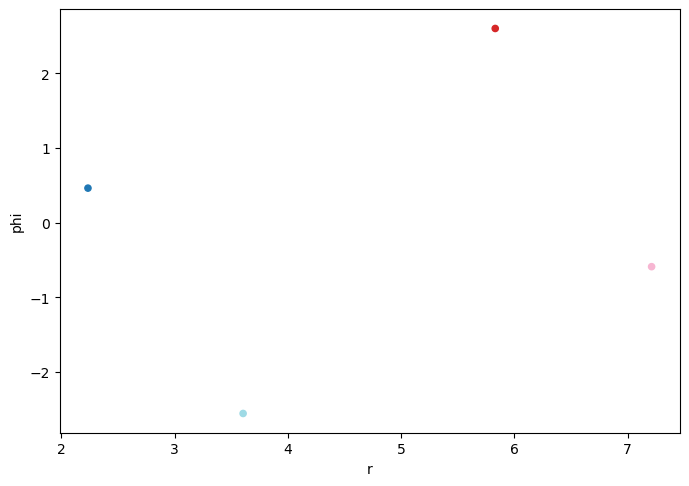

In [7]:
ax = xy_df.plot.scatter(x="r", y="phi", c=range(4), colorbar=False, cmap="tab20", figsize=(8.0, 5.5))

In [8]:
from sklearn.decomposition import PCA

In [10]:
iris_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
iris_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
53,5.5,2.3,4.0,1.3,versicolor
120,6.9,3.2,5.7,2.3,virginica
12,4.8,3.0,1.4,0.1,setosa
113,5.7,2.5,5.0,2.0,virginica
37,4.9,3.6,1.4,0.1,setosa


In [11]:
pca = PCA(n_components=2)
iris_2d = pca.fit_transform(iris_df.drop(columns=["species"]))

In [12]:
iris_2d_df = pd.DataFrame(iris_2d, columns=["pca_0", "pca_1"])
iris_2d_df.sample(5)

,pca_0,pca_1
104,2.350006,-0.040261
111,1.803402,-0.215638
118,3.795645,0.257323
11,-2.612755,0.014730
59,-0.008745,-0.723082


In [14]:
colors, mapping = pd.factorize(iris_df["species"])
colors, mapping

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64),
 Index(['setosa', 'versicolor', 'virginica'], dtype='object'))

<Axes: xlabel='pca_0', ylabel='pca_1'>

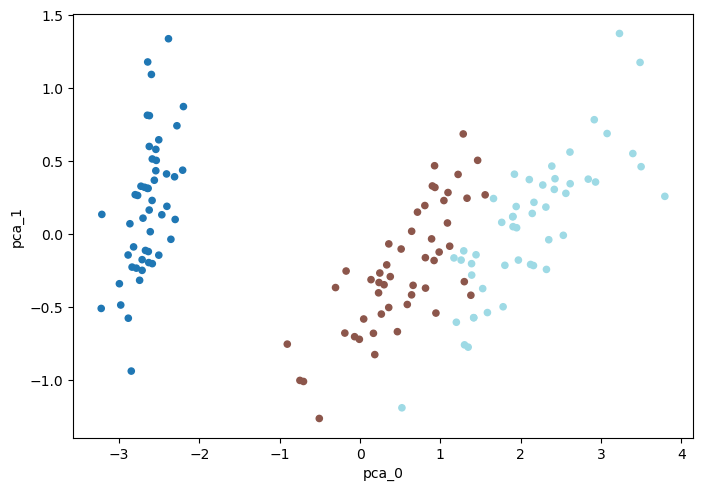

In [15]:
iris_2d_df.plot.scatter(x="pca_0", y="pca_1", c=colors, cmap="tab20", figsize=(8.0, 5.5), colorbar=False)

In [16]:
from sklearn.manifold import TSNE


In [17]:
tsne = TSNE(n_components=2)
iris_2d_tsne = tsne.fit_transform(iris_df.drop(columns=["species"]))
iris_2d_tsne_df = pd.DataFrame(iris_2d_tsne, columns=["tsne_0", "tsne_1"])
iris_2d_tsne_df.sample(5)

,tsne_0,tsne_1
105,18.851923,-2.414978
148,15.347630,-3.389599
27,-24.357187,-1.755770
86,11.898449,1.434883
8,-20.077644,-1.723608


<Axes: xlabel='tsne_0', ylabel='tsne_1'>

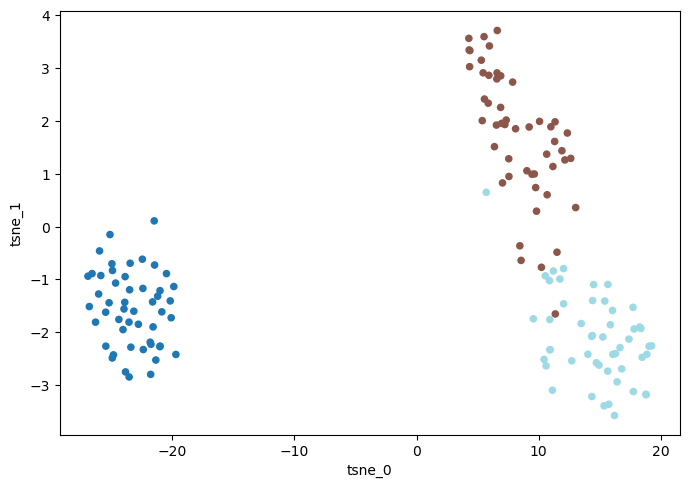

In [18]:
iris_2d_tsne_df.plot.scatter(x="tsne_0", y="tsne_1", c=colors, cmap="tab20", colorbar=False, figsize=(8.0, 5.5))